In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)


In [2]:
n = 300

df = pd.DataFrame({
    "order_id": range(1, n + 1),
    "restaurant": np.random.choice(
        ["Restaurant A", "Restaurant B", "Restaurant C", "Restaurant D", "Restaurant E"], n
    ),
    "order_value": np.random.randint(150, 1500, n),
    "delivery_time": np.random.randint(10, 90, n),
    "customer_rating": np.random.uniform(1, 5, n)
})

df.head()


,order_id,restaurant,order_value,delivery_time,customer_rating
0,1,Restaurant D,1210,42,1.806922
1,2,Restaurant E,429,47,3.738286
2,3,Restaurant C,646,15,1.351472
3,4,Restaurant E,451,67,1.555299
4,5,Restaurant E,330,53,1.010844


In [ ]:
poor_restaurants = (
    df.groupby("restaurant")["customer_rating"]
      .mean()
      .loc[lambda x: x < 3]
)

poor_restaurants


restaurant
Restaurant E    2.890426
Name: customer_rating, dtype: float64

In [4]:
revenue_per_restaurant = (
    df.groupby("restaurant")["order_value"]
      .sum()
)

revenue_per_restaurant


restaurant
Restaurant A    57727
Restaurant B    41229
Restaurant C    56643
Restaurant D    68928
Restaurant E    41808
Name: order_value, dtype: int32

In [5]:
delivery_times = df["delivery_time"].values

delivery_percentiles = {
    "50th_percentile": np.percentile(delivery_times, 50),
    "75th_percentile": np.percentile(delivery_times, 75),
    "90th_percentile": np.percentile(delivery_times, 90),
    "95th_percentile": np.percentile(delivery_times, 95)
}

delivery_percentiles


{'50th_percentile': np.float64(47.0),
 '75th_percentile': np.float64(68.0),
 '90th_percentile': np.float64(82.10000000000002),
 '95th_percentile': np.float64(86.0)}

In [6]:
df.loc[df.sample(frac=0.05).index, "delivery_time"] = np.nan


In [7]:
median_delivery_time = np.nanmedian(df["delivery_time"])
df["delivery_time"].fillna(median_delivery_time, inplace=True)


C:\Users\dhira\AppData\Local\Temp\ipykernel_28836\2610547860.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["delivery_time"].fillna(median_delivery_time, inplace=True)


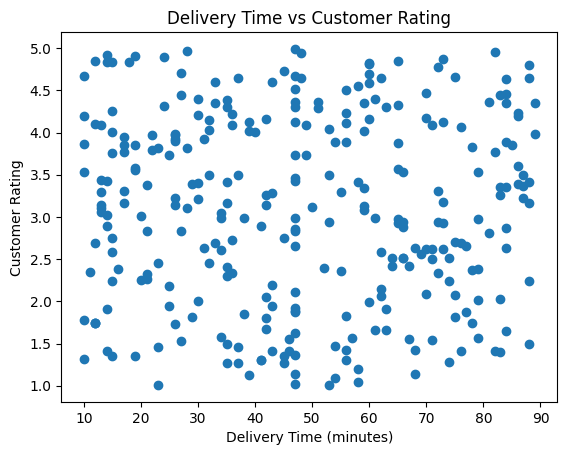

In [8]:
plt.scatter(df["delivery_time"], df["customer_rating"])
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Customer Rating")
plt.title("Delivery Time vs Customer Rating")
plt.show()


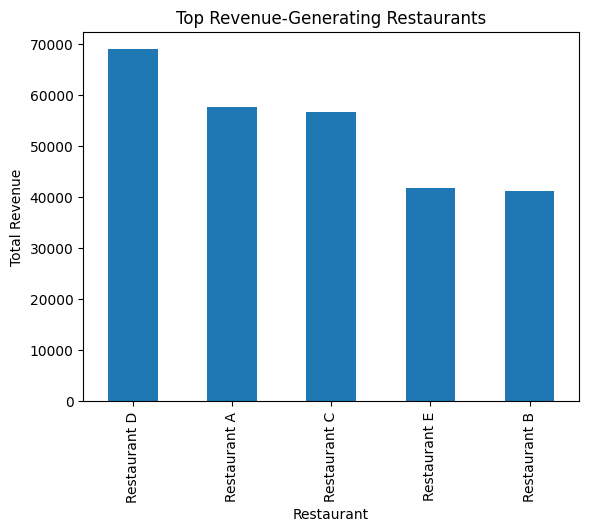

In [9]:
revenue_per_restaurant.sort_values(ascending=False).plot(kind="bar")
plt.xlabel("Restaurant")
plt.ylabel("Total Revenue")
plt.title("Top Revenue-Generating Restaurants")
plt.show()
